In [1]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [7]:
df = pd.read_csv("../data/acled/south_sudan.csv")
df.columns

Index(['EVENT_ID_CNTY', 'EVENT_DATE', 'YEAR', 'TIME_PRECISION',
       'DISORDER_TYPE', 'EVENT_TYPE', 'SUB_EVENT_TYPE', 'ACTOR1',
       'ASSOC_ACTOR_1', 'INTER1', 'ACTOR2', 'ASSOC_ACTOR_2', 'INTER2',
       'INTERACTION', 'CIVILIAN_TARGETING', 'ISO', 'REGION', 'COUNTRY',
       'ADMIN1', 'ADMIN2', 'ADMIN3', 'LOCATION', 'LATITUDE', 'LONGITUDE',
       'GEO_PRECISION', 'SOURCE', 'SOURCE_SCALE', 'NOTES', 'FATALITIES',
       'TAGS', 'TIMESTAMP'],
      dtype='object')

In [20]:
selected_columns = ['LATITUDE', 'LONGITUDE', 'FATALITIES', 'TIMESTAMP']
df_short = df[selected_columns].copy()
df_short.head()

,LATITUDE,LONGITUDE,FATALITIES,TIMESTAMP
0,6.209,31.559,0,1696268002
1,6.209,31.559,2,1696268002
2,6.180,31.811,1,1696268002
3,3.850,31.657,0,1696268002
4,4.452,34.188,0,1696268002


In [19]:
# df_short["EVENT_TYPE"].value_counts()
# test = pd.get_dummies(df_short, columns=['EVENT_TYPE'], dtype=int)
# test.head()

,LATITUDE,LONGITUDE,FATALITIES,TIMESTAMP,EVENT_TYPE_Battles,EVENT_TYPE_Explosions/Remote violence,EVENT_TYPE_Protests,EVENT_TYPE_Riots,EVENT_TYPE_Strategic developments,EVENT_TYPE_Violence against civilians
0,6.209,31.559,0,1696268002,0,0,1,0,0,0
1,6.209,31.559,2,1696268002,0,0,0,0,0,1
2,6.180,31.811,1,1696268002,0,0,0,0,0,1
3,3.850,31.657,0,1696268002,0,0,0,0,0,1
4,4.452,34.188,0,1696268002,1,0,0,0,0,0


In [24]:
X = df_short.drop('FATALITIES',axis=1)
y = df_short['FATALITIES']

In [26]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((6458, 3), (2768, 3))

In [28]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

%time
classifier_rf.fit(X_train, y_train)

CPU times: user 6 µs, sys: 3 µs, total: 9 µs
Wall time: 1.65 ms


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [29]:
classifier_rf.oob_score_


0.4927222050170331

In [30]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

%time
grid_search.fit(X_train, y_train)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 4.77 µs
Fitting 4 folds for each of 180 candidates, totalling 720 fits


/Users/kaylahuang/opt/anaconda3/envs/c-news/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [31]:
grid_search.best_score_

0.49659346814444816

In [32]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=20, n_estimators=50,
                       n_jobs=-1, random_state=42)

IndexError: list index out of range

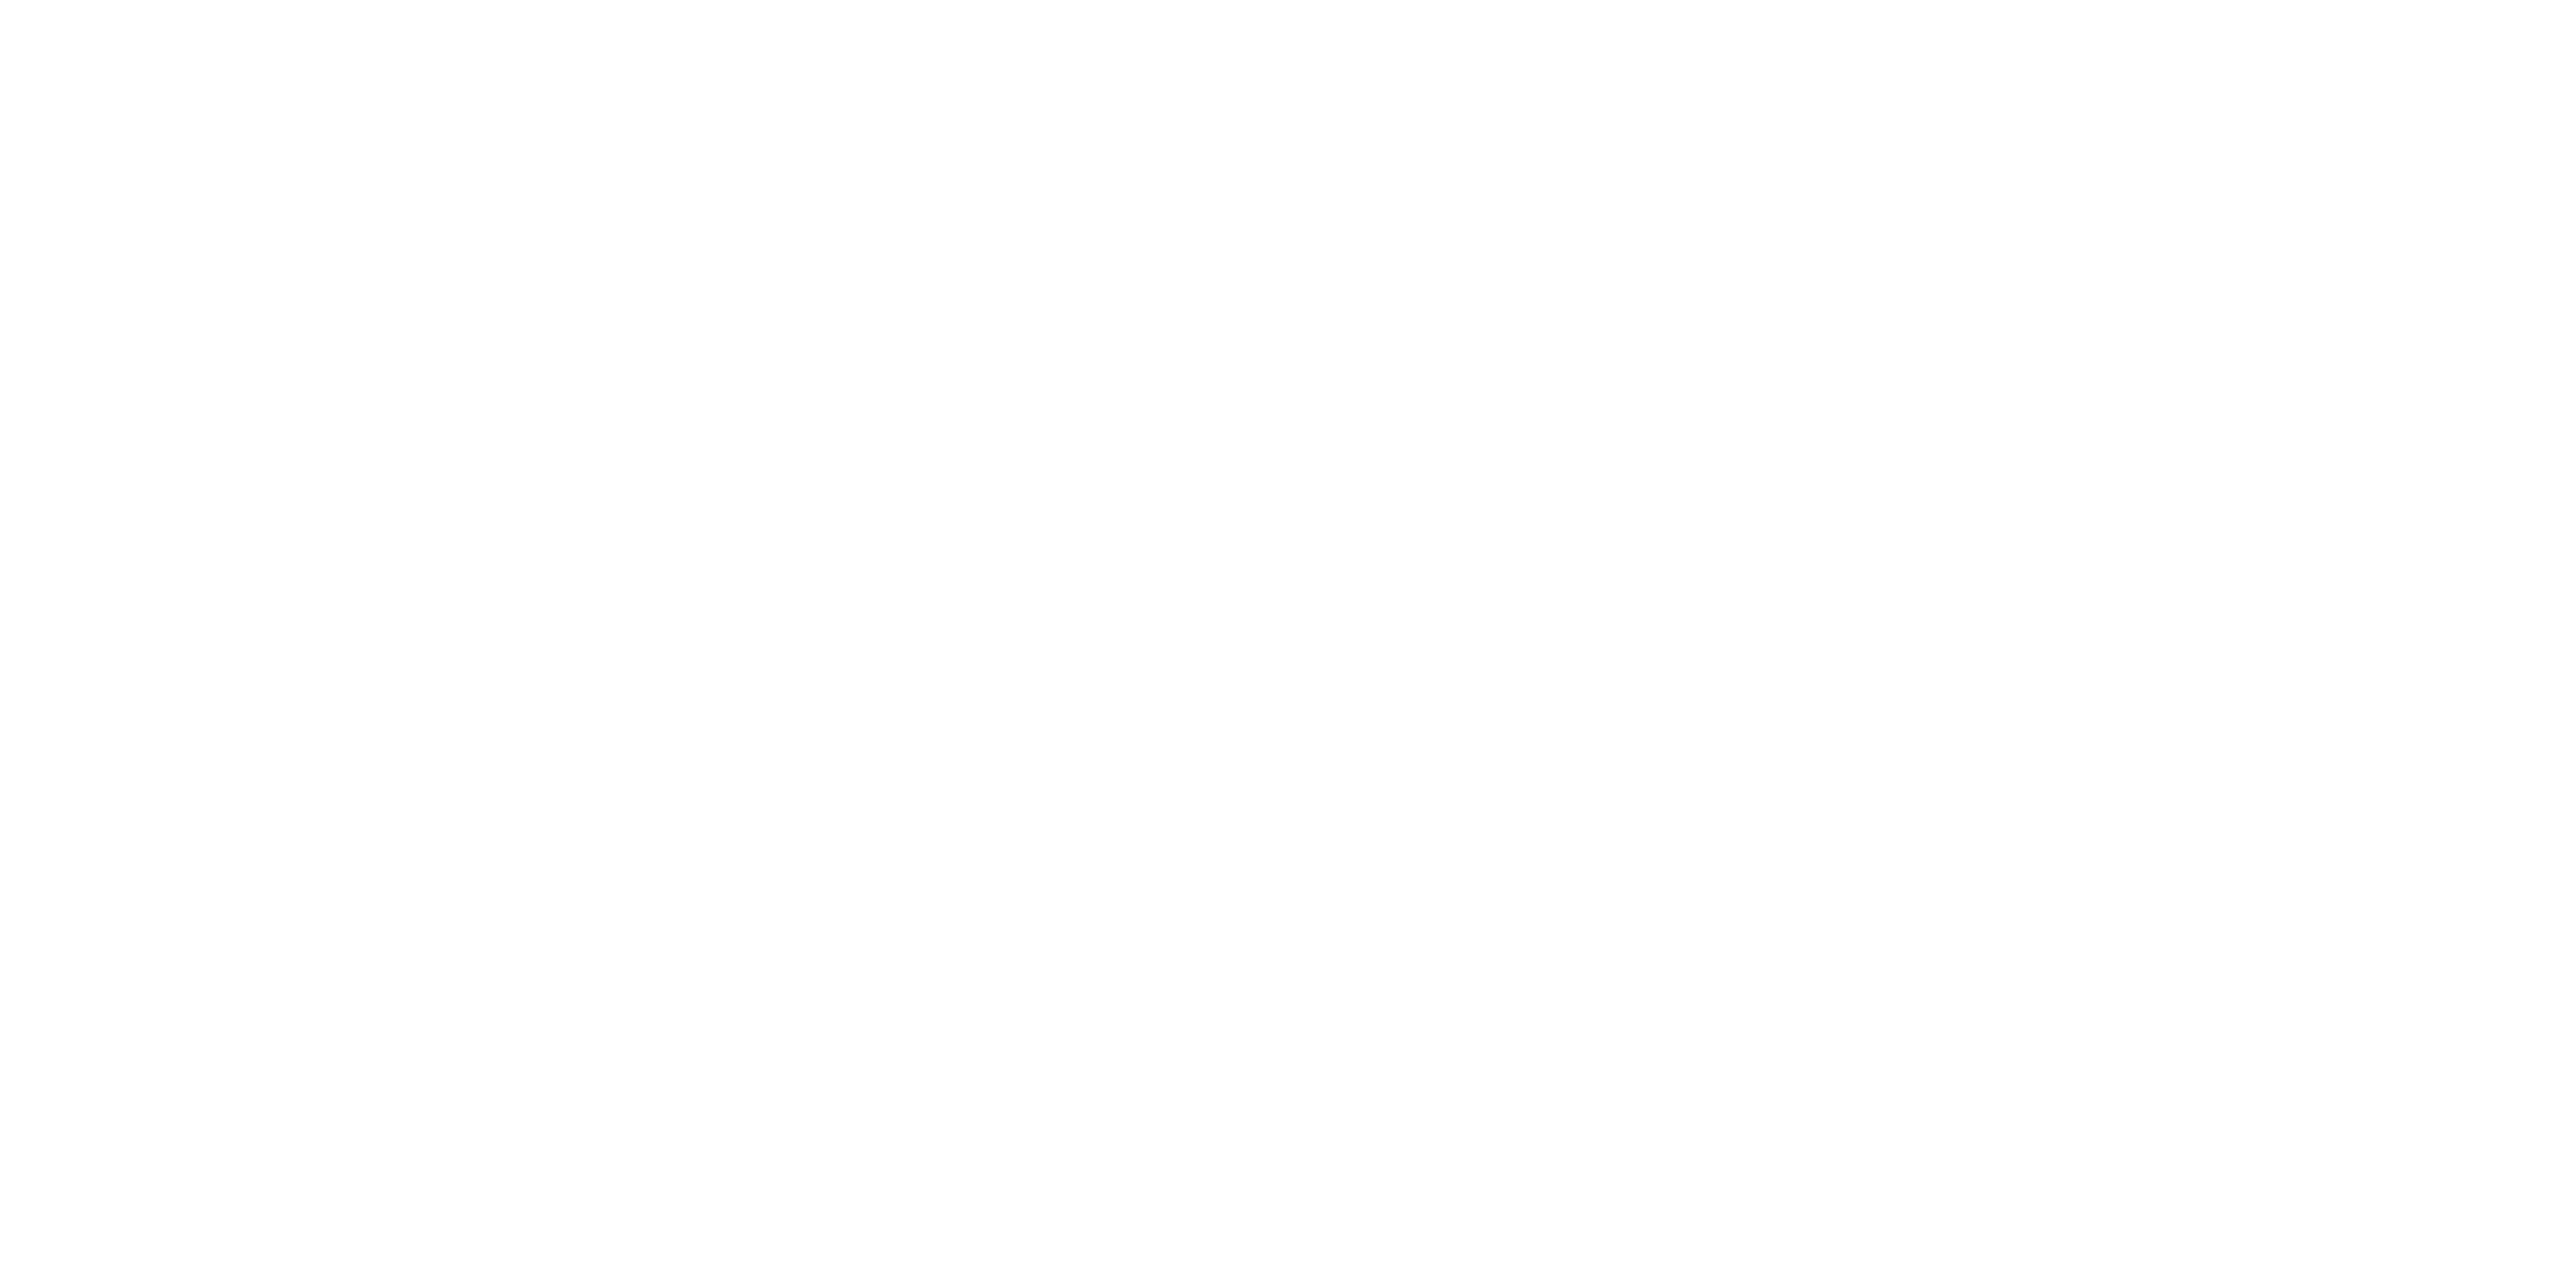

In [33]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);